# House Price Prediction
 **Performed by:** <br>
 Name: Giridhar Sreekumar <br>
 Date: 11 January 2026

**Description**: Predict the price of a house based on features like area, number of bedrooms, location, etc.

In [45]:
##All the required libraries are imported.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Dataset Loading

In this step, a real world dataset 'Housing.csv' is used instead of scikit preloaded datasets.


In [12]:
df=pd.read_csv('/content/Housing.csv')
df

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


## Exploratory Data Analysis (EDA)

The purpose of this exploratory data analysis is to understand the **structure**, **distribution**, and **relationships** within the house price dataset. The dataset consists of multiple numerical and categorical features such as area, number of bedrooms, and location, which are used to predict house prices.

EDA is performed using summary statistics and visualizations to **identify patterns**, **analyze correlations**, and **understand the influence of different features on house prices**. The insights obtained from this step help in selecting relevant features and building an effective linear regression model.


## Initial Inspection
Initial inspection helps identify the number of features, data types, and the target variable that needs to be predicted.

In [13]:
df.shape

(2000, 10)

In [14]:
df.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


**Missing and duplicate values are checked**

In [16]:
df.isnull().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
##Descriptive status
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [19]:
## Target Variable Analysis
df['Price'].describe()

,Price
count,2000.000000
mean,537676.855000
std,276428.845719
min,50005.000000
25%,300098.000000
50%,539254.000000
75%,780086.000000
max,999656.000000


### Conclusion of Initial Analysis

Initial Analysis was completed and it helped in providing an overview of the dataset structure, data types, and basic stastical properties. The dataset was found to be clean, with no missing values or duplicate values and the various analysis like target variable analysis helped us in confirming it is indeed regression due to being continuous. Since no cleaning was required, we declare dataset to be suitable for further exploratory analysis and visualisations to understand feature relationships.

In [26]:
## ===============================================

##Encoding
One-hot encoding is performed before visualisation to convert categorical features into numerical before visualisation in order to avoid datatype mismatch errors.


In [50]:
###Identify categorical columns
cat_cols=df.select_dtypes(include=['object']).columns
cat_cols

Index([], dtype='object')

In [51]:
###One-hot encoding
df=pd.get_dummies(df,columns=cat_cols,drop_first=True)

# Visualisation
Now that the data is cleaned and the structure is verified, let’s use **visualizations** to uncover underlying patterns, correlations, and distributions within the features."

## 1. Target Variable Distribution
* It helps us in understanding the distribution of house prices that can help us identify skewness, outliers and with the overall range of values.
* This insight is important as it helps for evaluation whether transformation or scaling is required

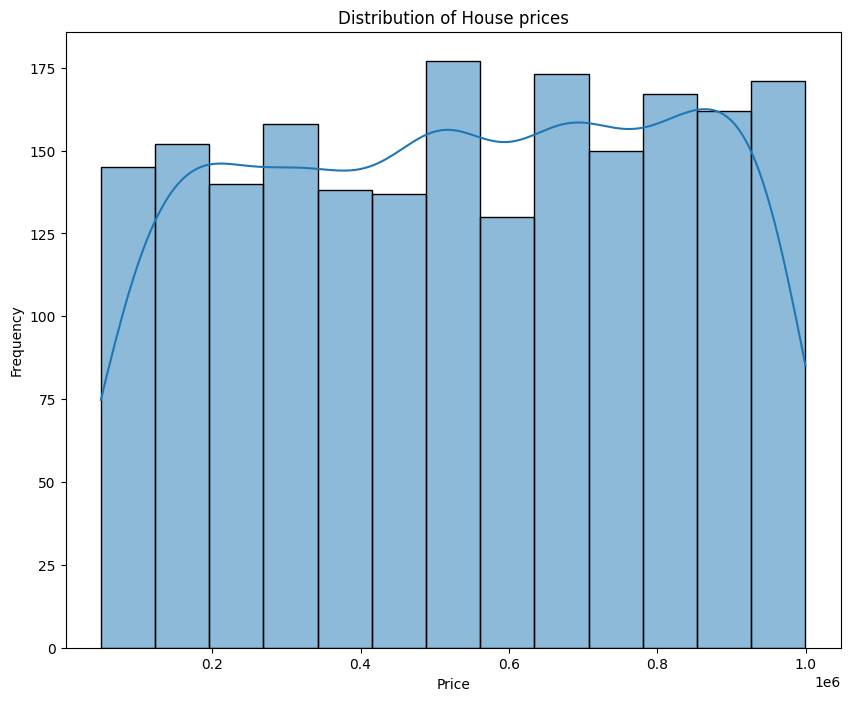

In [23]:
plt.figure(figsize=(10,8))
sns.histplot(df['Price'], kde=True) ##Kde curve enabled for better understanding of distribution
plt.title("Distribution of House prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

## 2. Correlation Heatmap
* It is performed to understand the strength and direction of relationship features and target variables.
* Helps us in identifying features that strongly influence house prices


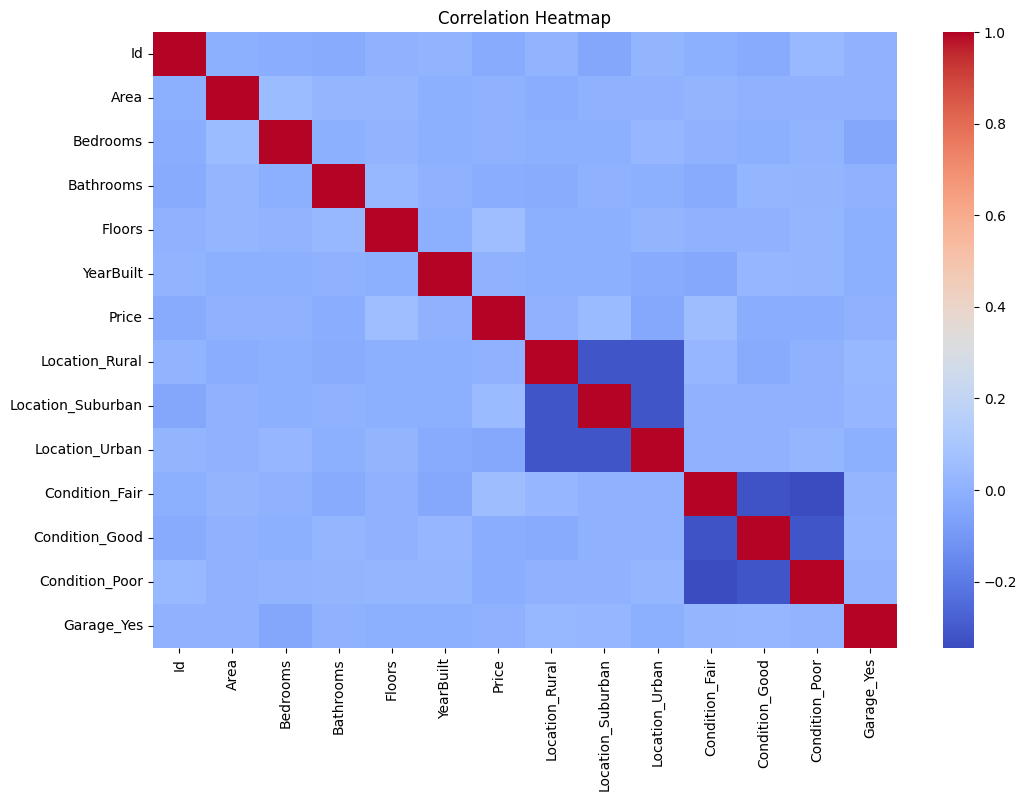

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 3. Feature vs Price(Scatter Plot)
* Scatter Plot is used to visualise relationship between key numerical features and house prices.
* Helps in identifying linear trends and patterns.

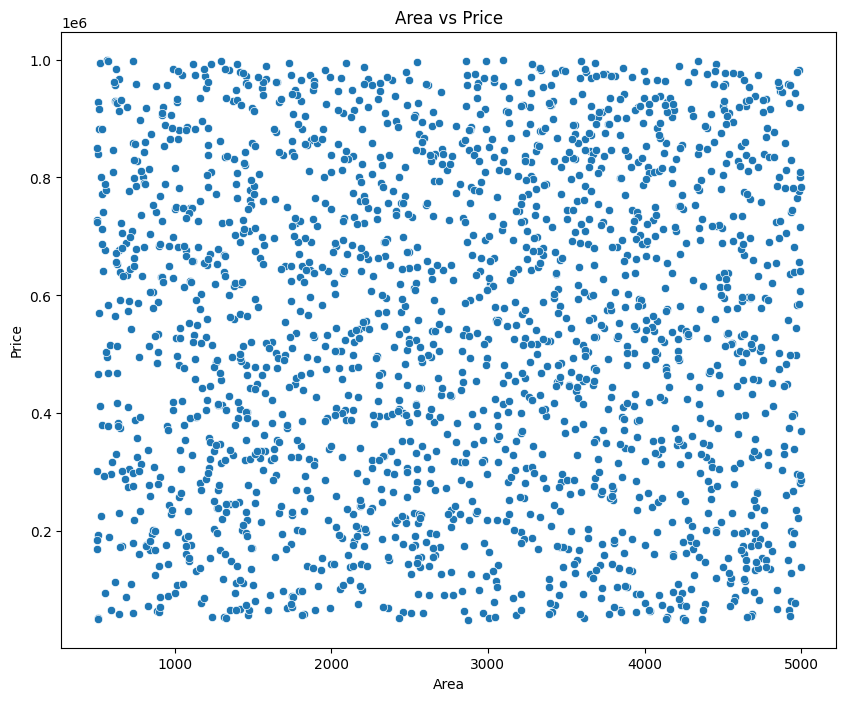

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['Area'],y=df['Price'])
plt.title("Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

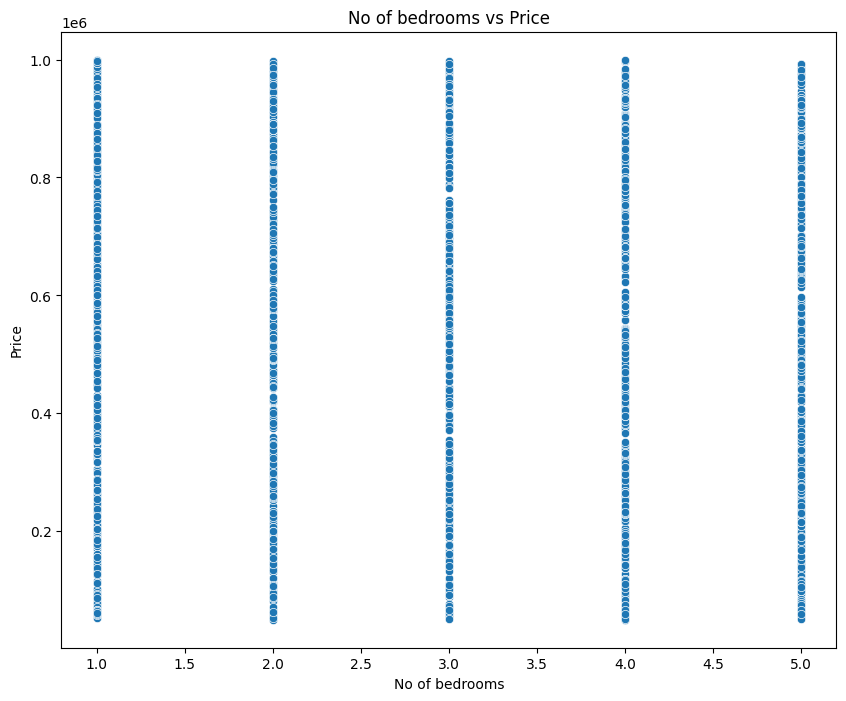

In [32]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['Bedrooms'],y=df['Price'])
plt.title("No of bedrooms vs Price")
plt.xlabel("No of bedrooms")
plt.ylabel("Price")
plt.show()

## 4. Box Plot
* Helps us in understanding the spread of price across different features.
* This helps us find outliers which may influence regression model


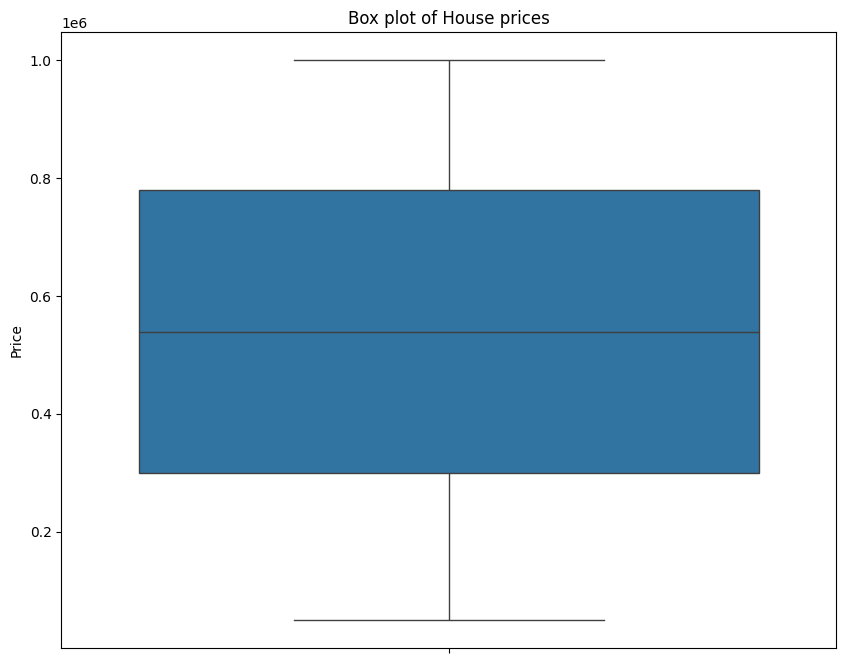

In [40]:
plt.figure(figsize=(10,8))
sns.boxplot(y=df['Price'])
plt.title("Box plot of House prices")
plt.show()

### Visualisation Summary

The exploratory data analysis revealed meaningful relationships between house prices and several key features. Correlation analysis showed that certain variables have a strong influence on price, while visualizations confirmed the presence of trends and variability within the data. These insights indicate that the dataset is suitable for building a linear regression model.


In [ ]:
## ========================================================

## Model Training and Evaluation
After completing data preprocessing and analysis, the dataset is prepared for bulding a regression model. In this step, we'll be splitting the data into training and testing sets after which a regression model will be trained, and its perfomance be evaluated using appropriate regression metrics

In [52]:
## ========================= TRAIN/TEST SPLIT =================================

 ***Since some features are found to be useless and less influential, important features are selected first inorder to increase efficiency for the model***


In [53]:
### Correlation check and top feature selection
corr_with_price= df.corr()['Price'].sort_values(ascending=False)
print(corr_with_price)

Price                1.000000
Floors               0.055890
Condition_Fair       0.049218
Location_Suburban    0.040303
YearBuilt            0.004845
Garage_Yes           0.002842
Location_Rural       0.001890
Area                 0.001542
Bedrooms            -0.003471
Bathrooms           -0.015737
Condition_Good      -0.017179
Condition_Poor      -0.018437
Id                  -0.025643
Location_Urban      -0.038312
Name: Price, dtype: float64


### Feature Selection Discussion

Correlation analysis revealed that none of the features had a strong linear relationship with house prices. Therefore, a lower correlation threshold was used to select relatively influential features. This highlights the weak linear nature of the dataset and the limitations of using simple linear regression for price prediction.


In [58]:
selected_features=corr_with_price[abs(corr_with_price)>0.02].index
selected_features=selected_features.drop(["Price","Id"])
selected_features

Index(['Floors', 'Condition_Fair', 'Location_Suburban', 'Location_Urban'], dtype='object')

In [63]:
### The features and are then scaled for better model
X=df[selected_features]
y=df['Price']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [64]:
#Then dataset is split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
## ======================== MODEL =========================
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [66]:
## ======================= PREDICTION ======================

y_pred=model.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
r2= r2_score(y_test,y_pred)

print("Mean Squared Error:", mse)
print("R² score:", r2)

Mean Squared Error: 77322233429.465
R² score: 0.006125993147987674


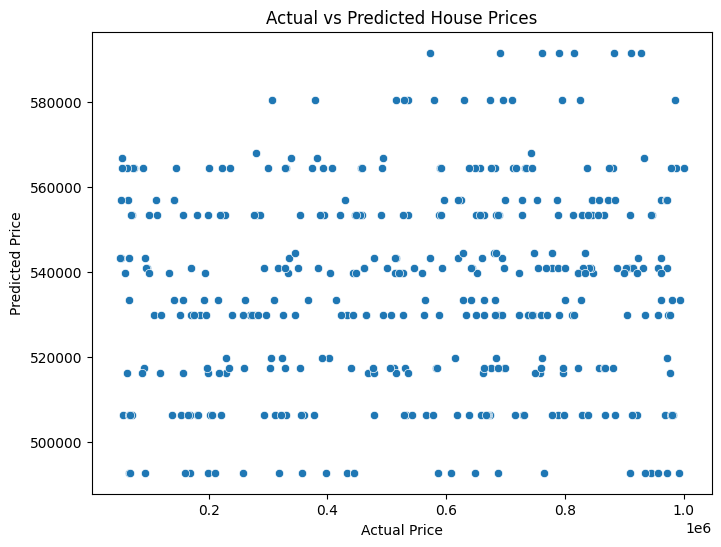

In [67]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


## Conclusion of Model Evaluation
Despite applying data preprocessing, encoding categorical variables, and even multiple feature selection techniques in addition with scaling techniques, the Linear Regression Model achieved a very low score. This indicates that the available features have very weak linear relationship with the prices and the visualisations was able to prove this to an extent and the model confirmed it.

* The dataset appears to lack strong predictive features, making it unsuitable or effective linear regression model.

* This indicates limiations of the dataset rather than modeling approach.


**------------------ CONCLUSION ------------------**

The house price prediction experiment was conducted using a Linear Regression Model on a real world dataset. The dataset was cleaned, preprocessed, and explore through visual and statistical analysis, correlation analysis and model evaluation revealed that the features provided had minimum linear relationship with our target feature i.e, House prices, resulting in low predictive perfomances. This experiement showed us that dataset should be of a good quality and features relevance should also be expected in order to create a highly efficient model. This also showed me that probably with the help of a stronger model that can work on weak linear relationships,better predictions could be made.